In [449]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.exceptions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
import sklearn.exceptions

df = pd.read_csv('C:\python Projects/zoo.csv') #../input/zoo.csv
df.info()
print ('End')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 13.9+ KB
End


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [450]:
df02 = pd.read_csv('C:\python Projects/class.csv') #../input/class.csv
df02.info()
print ('End')
df02.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 232.0+ bytes
End


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [462]:
#Merging DataFrames
df03 = df.merge(df02,how='left',left_on='class_type',right_on='Class_Number') 
df03.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


<AxesSubplot:>

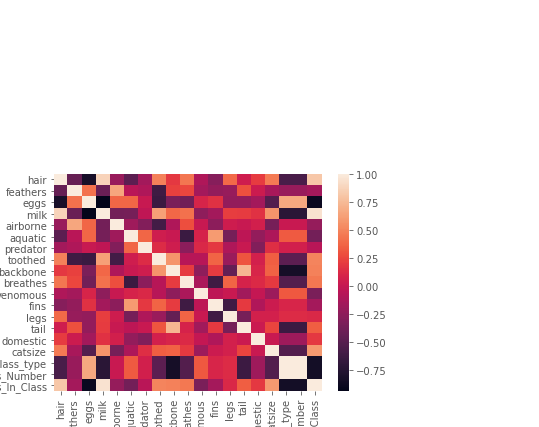

In [452]:
df03 = df03.iloc[:,1:-1]
label_encoder = LabelEncoder()
df03.iloc[:,0] = label_encoder.fit_transform(df03.iloc[:,0]).astype('float64')
corr = df03.corr()
sns.heatmap(corr)




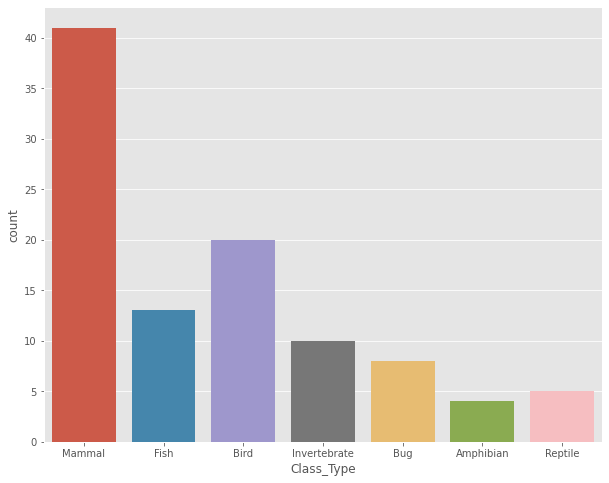

In [453]:
#Plotting class types and the number of them.
plt.figure(figsize = (10,8))
sns.countplot(df03['Class_Type'],label="Count")
plt.show()


<AxesSubplot:ylabel='Class_Type'>

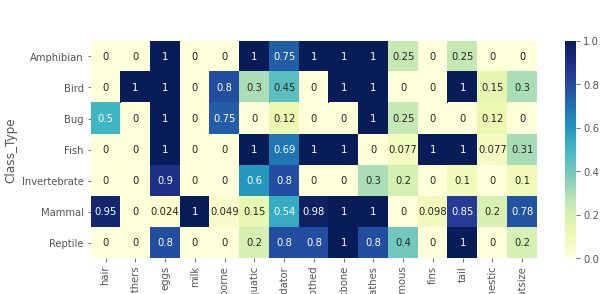

In [454]:
#Creating a heatmap for the percentage of features on class types.
f_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic', 'catsize'] #removed class type and animal name

df03['clt'] = 1

br = df03.groupby(by='Class_Type').mean()
columns = ['class_type','Class_Number','Number_Of_Animal_Species_In_Class','clt','legs']
br.drop(columns, inplace=True, axis=1)
plt.subplots(figsize=(10,4))
sns.heatmap(br, annot=True, cmap="YlGnBu")


In [455]:
#Creating a decision tree model with 20% training of the data. 
#Model 1

X = df[f_names].values.astype(np.float32)
y = df['class_type'] 

#Spliting the dataframe into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, test_size=.8, random_state = 0)

#Specifing the model for trainning 
classifier = DecisionTreeClassifier().fit(X_train, y_train)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning) #Ignore warning for dividing by zero equals zero

#Results
pred1 = classifier.predict(X_test)
print('Model 1 accuracy of classifier: {:.2f}' #Accuracy of the classifier on the test set.
     .format(classifier.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred1))
print()
print(classification_report(y_test, pred1))

df03[['Class_Type','class_type']].drop_duplicates().sort_values(by='class_type') #The order of the labels in the confusion matrix

Model 1 accuracy of classifier: 0.93

[[33  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0  0  1  4  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  7]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        15
           3       0.00      0.00      0.00         5
           4       0.92      1.00      0.96        12
           5       0.43      1.00      0.60         3
           6       0.83      1.00      0.91         5
           7       1.00      0.88      0.93         8

    accuracy                           0.93        81
   macro avg       0.74      0.84      0.77        81
weighted avg       0.90      0.93      0.91        81



,Class_Type,class_type
0,Mammal,1
11,Bird,2
62,Reptile,3
2,Fish,4
25,Amphibian,5
24,Bug,6
13,Invertebrate,7


In [456]:
#Displaying the most important features of the model 1
importance = pd.DataFrame(classifier.feature_importances_)
feature = pd.DataFrame(f_names)
feature_importance = pd.concat([feature,importance],axis=1, )
feature_importance.columns = ['Feature', 'Importance']
feature_importance.sort_values(by='Importance',ascending=False)



,Feature,Importance
3,milk,0.414414
1,feathers,0.257400
8,backbone,0.098456
4,airborne,0.072072
9,breathes,0.067568
12,legs,0.067568
5,aquatic,0.022523
0,hair,0.000000
2,eggs,0.000000
6,predator,0.000000


In [457]:
#Creating a decision tree model with 10% training of the data. 
#Model 2
X = df[f_names].values.astype(np.float32)
y = df['class_type'] #there are multiple classes in this column

#spliting the dataframe into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1, test_size=.9, random_state = 0)

#specifing the model for trainning
classifier2 = DecisionTreeClassifier().fit(X_train, y_train)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)  #ignore warning for dividing by zero equals zero

#Results
pred = classifier2.predict(X_test)
print('Model 2 accuracy of classifier: {:.2f}' #Accuracy of the classifier on the test set.
     .format(classifier2.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))
df03[['Class_Type','class_type']].drop_duplicates().sort_values(by='class_type') #The order of the labels in the confusion matrix


Model 2 accuracy of classifier: 0.64

[[34  1  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 1  4  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  0  0  0  7  0]
 [ 1  5  0  0  0  4  0]]

              precision    recall  f1-score   support

           1       0.94      0.97      0.96        35
           2       0.39      1.00      0.56        17
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       0.64      1.00      0.78         7
           7       0.00      0.00      0.00        10

    accuracy                           0.64        91
   macro avg       0.28      0.42      0.33        91
weighted avg       0.48      0.64      0.53        91



,Class_Type,class_type
0,Mammal,1
11,Bird,2
62,Reptile,3
2,Fish,4
25,Amphibian,5
24,Bug,6
13,Invertebrate,7


In [458]:
#Displaying the most important features of the model 2
importance2 = pd.DataFrame(classifier2.feature_importances_)
feature = pd.DataFrame(f_names)
feature_importance2 = pd.concat([feature,importance2],axis=1, )
feature_importance2.columns = ['Feature', 'Importance']
feature_importance2.sort_values(by='Importance',ascending=False)

,Feature,Importance
2,eggs,0.722222
12,legs,0.277778
0,hair,0.000000
1,feathers,0.000000
3,milk,0.000000
4,airborne,0.000000
5,aquatic,0.000000
6,predator,0.000000
7,toothed,0.000000
8,backbone,0.000000


In [459]:
#Reducing the depth size of the tree.
classifier3= DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

#Results
pred = classifier3.predict(X_test)
print('Model 3 accuracy of classifier: {:.2f}'
     .format(classifier3.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Model 3 accuracy of classifier: 0.65

[[35  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0 13  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  0 10  0]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        17
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           6       0.18      1.00      0.30         7
           7       0.00      0.00      0.00        10

    accuracy                           0.65        91
   macro avg       0.31      0.43      0.33        91
weighted avg       0.59      0.65      0.59        91



In [460]:
#Displaying the most important features of the model 3
importance3 = pd.DataFrame(classifier2.feature_importances_)
feature = pd.DataFrame(f_names)
feature_importance3 = pd.concat([feature,importance3],axis=1, )
feature_importance3.columns = ['Feature', 'Importance']
feature_importance3.sort_values(by='Importance',ascending=False)

,Feature,Importance
2,eggs,0.722222
12,legs,0.277778
0,hair,0.000000
1,feathers,0.000000
3,milk,0.000000
4,airborne,0.000000
5,aquatic,0.000000
6,predator,0.000000
7,toothed,0.000000
8,backbone,0.000000


[Text(0, 0, 'Model 1'), Text(1, 0, 'Model 2'), Text(2, 0, 'Model 3')]

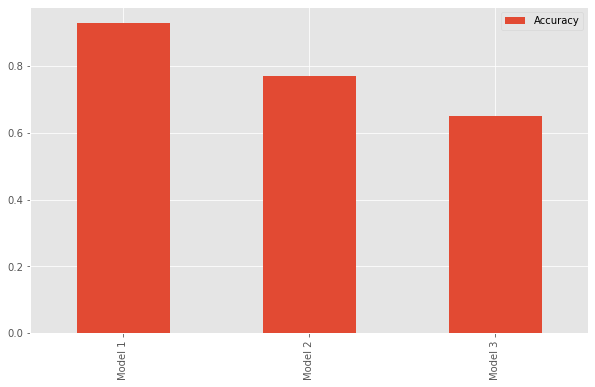

In [465]:
#Visualising the comparison of the models for Accuracy, Precision, Recall and F1
columns = ['Model','Test %', 'Accuracy']
df_final = pd.DataFrame(columns=columns)

df_final.loc[len(df_final)] = ["Model 1",20,.93] #The metrics where written manually after running the models.
df_final.loc[len(df_final)] = ["Model 2",10,.77] 
df_final.loc[len(df_final)] = ["Model 3",20,.65]
box=df_final[['Accuracy',]].plot(kind='bar', figsize=(10,6))
box.set_xticklabels(df_final.Model)